In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

stops_cols = ["Longitude", "Latitude"]
stops = pd.read_csv('stops.csv',names=stops_cols)
distances_cols = ['stop0','stop1','stop2','stop3','stop4','stop5','stop6','stop7','stop8','stop9','stop10','stop11']
distances = pd.read_csv('distances.csv',names=distances_cols)
distance_matrix = distances.to_numpy()


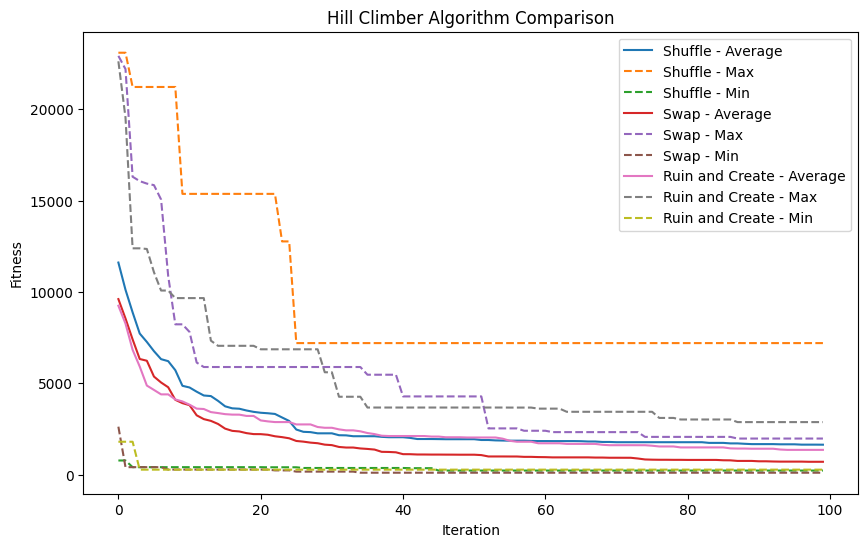

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate a random solution
def generate_solution():
    stops = np.arange(12)
    np.random.shuffle(stops)
    return stops.reshape(3, 4)

# 2. Implement a fitness function
def fitness(solution, distance_matrix, balance_weight=1000):
    total_distance = 0
    route_lengths = []
    for group in solution:
        route_length = 0
        for i in range(3):  # 4 stops, 3 segments per group
            route_length += distance_matrix[group[i]][group[i + 1]]
        total_distance += route_length
        route_lengths.append(route_length)
    
    max_length = max(route_lengths)
    min_length = min(route_lengths)
    balance_penalty = max_length - min_length
    
    # Penalize the fitness value if the route lengths are not equal
    return total_distance + balance_weight * balance_penalty

# 3. Mutation operators
def shuffle_group(solution):
    child = solution.copy()
    group_idx = np.random.randint(0, 3)
    np.random.shuffle(child[group_idx])
    return child

def swap_stops(solution):
    child = solution.copy()
    idx1, idx2 = np.random.choice(12, 2, replace=False)
    group1, pos1 = divmod(idx1, 4)
    group2, pos2 = divmod(idx2, 4)
    child[group1][pos1], child[group2][pos2] = child[group2][pos2], child[group1][pos1]
    return child

def ruin_and_create(solution):
    return generate_solution()

# Hill Climber Algorithm
def hill_climber(iterations, distance_matrix, mutation_operator, balance_weight=1000):
    best_solution = generate_solution()
    best_fitness = fitness(best_solution, distance_matrix, balance_weight)
    fitnesses = []

    for _ in range(iterations):
        child = mutation_operator(best_solution)
        child_fitness = fitness(child, distance_matrix, balance_weight)
        if child_fitness < best_fitness:
            best_solution = child
            best_fitness = child_fitness
        fitnesses.append(best_fitness)

    return best_solution, fitnesses

# Assuming distance_matrix is available for 12 stops
iterations = 100
num_runs = 30
mutation_operators = [shuffle_group, swap_stops, ruin_and_create]
mutation_labels = ["Shuffle", "Swap", "Ruin and Create"]
balance_weight = 1000  # Adjust this value based on your requirements

# Run the hill climber and collect fitness data
all_fitness_data = []
for mutation_operator, label in zip(mutation_operators, mutation_labels):
    fitness_data = []
    for _ in range(num_runs):
        _, fitnesses = hill_climber(iterations, distance_matrix, mutation_operator, balance_weight)
        fitness_data.append(fitnesses)
    all_fitness_data.append(np.array(fitness_data))

# Plot the results
plt.figure(figsize=(10, 6))
for i, label in enumerate(mutation_labels):
    avg_fitness = np.mean(all_fitness_data[i], axis=0)
    max_fitness = np.max(all_fitness_data[i], axis=0)
    min_fitness = np.min(all_fitness_data[i], axis=0)

    plt.plot(avg_fitness, label=f"{label} - Average")
    plt.plot(max_fitness, label=f"{label} - Max", linestyle="--")
    plt.plot(min_fitness, label=f"{label} - Min", linestyle="--")

plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.legend()
plt.title("Hill Climber Algorithm Comparison")
plt.show()